In [43]:
# Librerie per la manipolazione dei dati
import numpy as np                
import pandas as pd               
import seaborn as sns             
import matplotlib.pyplot as plt    

# Riduzione dimensionale e pre-processing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Algoritmi di clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

# Metriche di valutazione dei cluster
from sklearn.metrics import silhouette_samples, silhouette_score

# Algoritmi per il numero ottimale di cluster
from kneed import KneeLocator
from yellowbrick.cluster import KElbowVisualizer

In [44]:
df = pd.read_csv('dataset/obesity.csv')

In [45]:
# Dizionario di mapping
mapping = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

mapping_features =['CALC', 'CAEC']
# Applicare il mapping
df[mapping_features] = df[mapping_features].apply(lambda x: x.map(mapping))


In [46]:
# Dizionario di mapping
mapping = {
    'no': False,
    'yes': True
}

mapping_features =['SMOKE', 'family_history','FAVC', 'SCC']
# Applicare il mapping
df[mapping_features] = df[mapping_features].apply(lambda x: x.map(mapping))


In [47]:
df = df[df['Gender'] == 'Male']

In [48]:
df['Obesity'].value_counts()

Obesity
Obesity_Type_II        295
Obesity_Type_I         195
Overweight_Level_II    187
Normal_Weight          146
Overweight_Level_I     145
Insufficient_Weight     99
Obesity_Type_III         1
Name: count, dtype: int64

In [49]:
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
2,Male,23.000000,1.800000,77.000000,True,False,2.000000,3.000000,1,False,2.000000,False,2.000000,1.000000,2,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,False,False,3.000000,3.000000,1,False,2.000000,False,2.000000,0.000000,2,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,False,False,2.000000,1.000000,1,False,2.000000,False,0.000000,0.000000,1,Public_Transportation,Overweight_Level_II
5,Male,29.000000,1.620000,53.000000,False,True,2.000000,3.000000,1,False,2.000000,False,0.000000,0.000000,1,Automobile,Normal_Weight
7,Male,22.000000,1.640000,53.000000,False,False,2.000000,3.000000,1,False,2.000000,False,3.000000,0.000000,1,Public_Transportation,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,Male,30.642430,1.653876,102.583895,True,True,2.919526,2.142328,1,False,1.175714,False,0.958555,0.636289,0,Public_Transportation,Obesity_Type_II
1795,Male,20.068432,1.657132,105.580491,True,True,2.724121,1.437959,1,False,1.590418,False,0.029603,1.122118,0,Public_Transportation,Obesity_Type_II
1796,Male,20.914366,1.644751,101.067988,True,True,2.801992,1.343117,1,False,1.128942,False,0.233987,0.819980,0,Public_Transportation,Obesity_Type_II
1797,Male,25.512048,1.660761,104.321463,True,True,2.748971,1.213431,1,False,1.448875,False,0.128548,1.239038,0,Public_Transportation,Obesity_Type_II


## Correlation Analysis

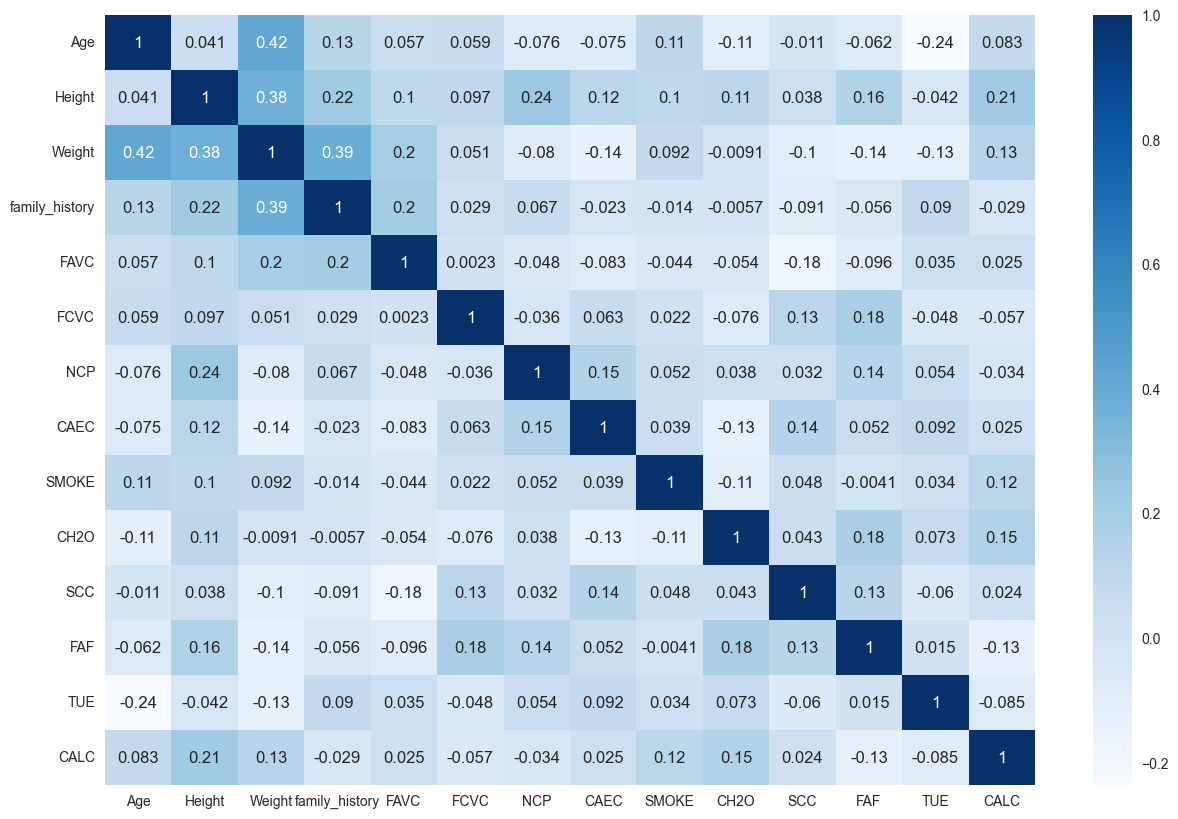

In [50]:
# Creazione e visualizzazione della heatmap per il sottoinsieme selezionato con dimensioni personalizzate della figura
plt.figure(figsize=(15, 10))
heatmap_data = df[['Age', 'Height', 'Weight', 'family_history', 'FAVC', 
    'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC'
]].corr()

ax = sns.heatmap(
    heatmap_data,
    cmap="Blues",
    annot=True,
    annot_kws={"size": 12}
)  # Visualizza la heatmap con annotazioni
plt.show()


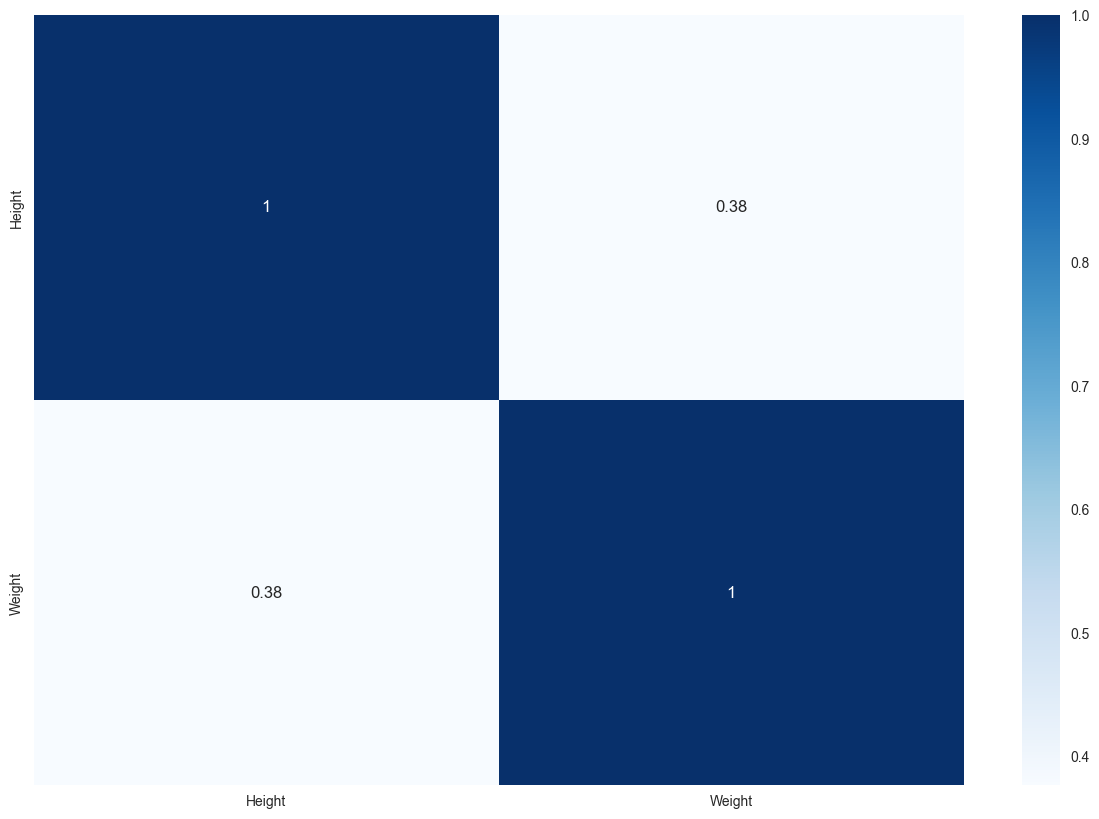

In [51]:
# Creazione e visualizzazione della heatmap per il sottoinsieme selezionato con dimensioni personalizzate della figura
plt.figure(figsize=(15, 10))
heatmap_data = df[['Height', 'Weight']].corr()
ax = sns.heatmap(
    heatmap_data,
    cmap="Blues",
    annot=True,
    annot_kws={"size": 12}
)  # Visualizza la heatmap con annotazioni
plt.show()


## Elbow Method

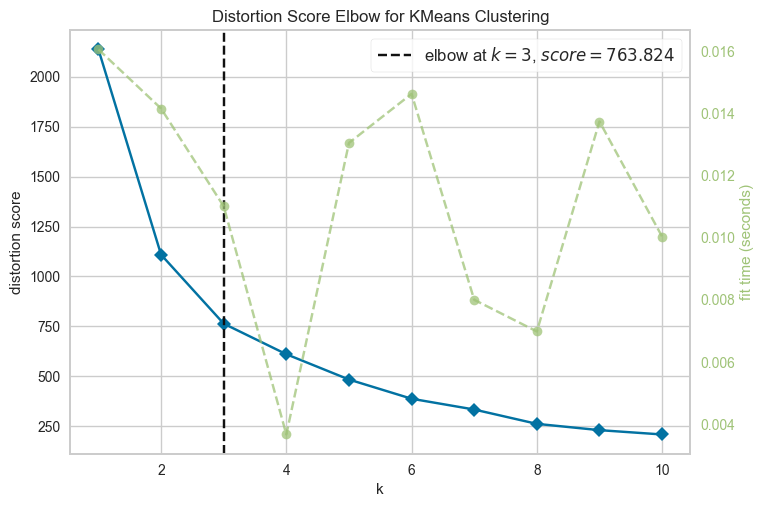

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
# Normalizza i dati
scaler = StandardScaler()
data = scaler.fit_transform(df[['Height', 'Weight']])

# Determina il numero ottimale di cluster usando il metodo Elbow
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1, 11), metric='distortion', timings=True)
visualizer.fit(data)
visualizer.show()


## K-Means

In [53]:
# Applica K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data)
clusters = kmeans.predict(data)

# Aggiungi i cluster al DataFrame
filtered_data = df.copy()
filtered_data['Cluster'] = clusters

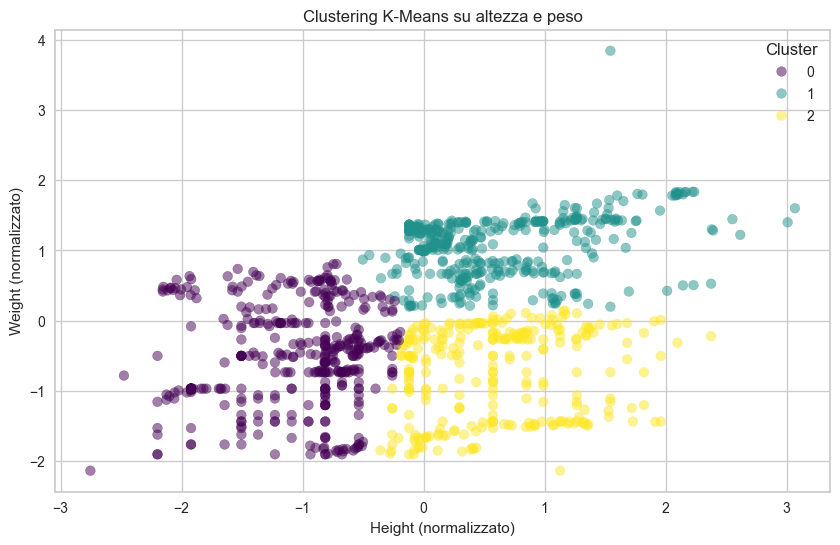

In [54]:
# Grafico del clustering
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('Height (normalizzato)')
plt.ylabel('Weight (normalizzato)')
plt.title('Clustering K-Means su altezza e peso')
plt.legend(*scatter.legend_elements(), title="Cluster", loc='best')
plt.show()

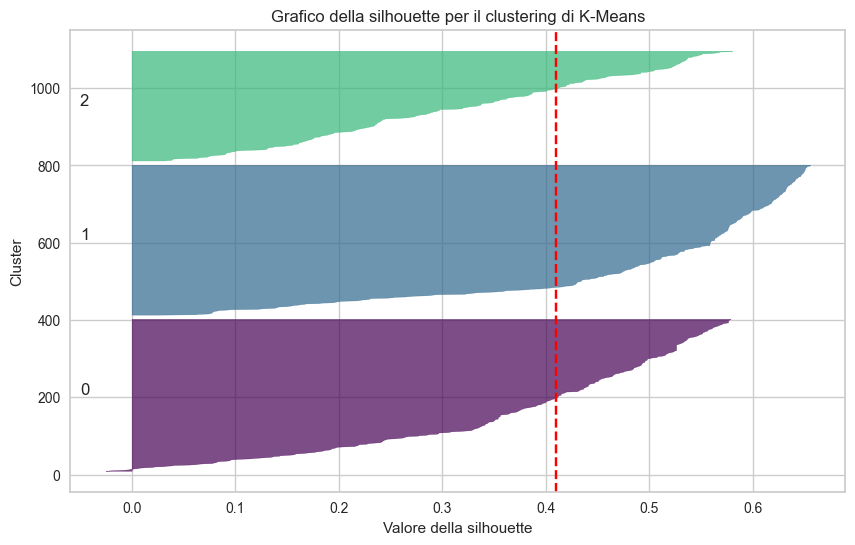

In [55]:
# Calcola i campioni di silhouette per ciascun punto
silhouette_vals = silhouette_samples(data, clusters)

# Calcola la silhouette media per l'intero clustering
silhouette_avg = silhouette_score(data, clusters)

# Visualizza il grafico della silhouette
plt.figure(figsize=(10, 6))
y_lower = 10
n_clusters = len(set(clusters))

for i in range(n_clusters):
    # Accumula i valori di silhouette del cluster i e ordina i valori
    ith_cluster_silhouette_vals = silhouette_vals[clusters == i]
    ith_cluster_silhouette_vals.sort()
    
    y_upper = y_lower + len(ith_cluster_silhouette_vals)
    color = plt.cm.viridis(i / n_clusters)
    
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    # Etichetta ogni silhouette con il rispettivo cluster al centro del grafico
    plt.text(-0.05, y_lower + 0.5 * len(ith_cluster_silhouette_vals), str(i))
    
    # Aggiorna y_lower per il prossimo cluster
    y_lower = y_upper + 10

# Linea verticale per la silhouette media dell'intero clustering
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.xlabel("Valore della silhouette")
plt.ylabel("Cluster")
plt.title("Grafico della silhouette per il clustering di K-Means")
plt.show()

## Clusters Description

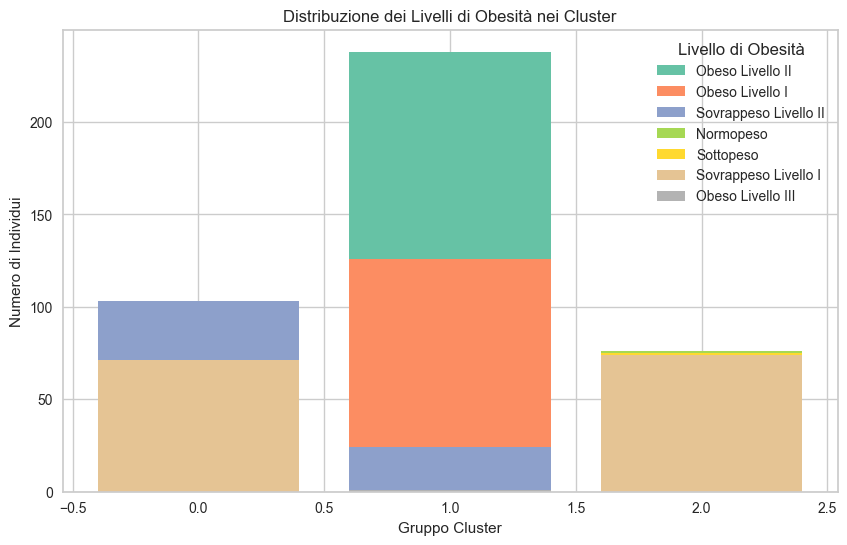

In [56]:
# Conta il numero di individui per Cluster e Livello di Obesità
obesity_per_cluster = filtered_data.value_counts(["Cluster", "Obesity"]).reset_index(name="Count")

# Mappatura dei livelli di obesità ai nuovi nomi
obesity_labels = {
    "Insufficient_Weight": "Sottopeso",
    "Normal_Weight": "Normopeso",
    "Overweight_Level_I": "Sovrappeso Livello I",
    "Overweight_Level_II": "Sovrappeso Livello II",
    "Obesity_Type_I": "Obeso Livello I",
    "Obesity_Type_II": "Obeso Livello II",
    "Obesity_Type_III": "Obeso Livello III"
}

# Sostituzione dei nomi nel dataframe
obesity_per_cluster["Obesity"] = obesity_per_cluster["Obesity"].replace(obesity_labels)

# Selezione colormap
colormap = plt.colormaps["Set2"]

# Assegna un colore univoco a ogni livello di obesità
unique_labels = obesity_per_cluster["Obesity"].unique()
colori = {label: colormap(i / (len(unique_labels) - 1)) for i, label in enumerate(unique_labels)}

# Grafico della distribuzione dei livelli di obesità
plt.figure(figsize=(10, 6))
for obesity_level, color in colori.items():
    cluster_data = obesity_per_cluster[obesity_per_cluster["Obesity"] == obesity_level]
    plt.bar(cluster_data["Cluster"], cluster_data["Count"], color=color, label=obesity_level)

# Personalizzazione del grafico
plt.xlabel("Gruppo Cluster")
plt.ylabel("Numero di Individui")
plt.title("Distribuzione dei Livelli di Obesità nei Cluster")
plt.legend(title="Livello di Obesità")
plt.show()


# DBSCAN

In [58]:
filtered_data = df
data = filtered_data[['Height', 'Weight']]

# Imputazione con la media
data = data.fillna(data.mean())

# Standardizzazione dei dati
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=2)  # Sostituisci 2 con il numero di componenti che vuoi
pca_result = pca.fit_transform(data_scaled)

# Calcola le distanze dai vicini più prossimi
k = 3 # Imposta 'k' uguale a min_samples.+-
neigh = NearestNeighbors(n_neighbors=k)
neighbors = neigh.fit(pca_result)
distances, indices = neighbors.kneighbors(pca_result)

# Ordina le distanze in ordine crescente
distances = np.sort(distances[:, 1], axis=0)  # Prendi solo la seconda colonna per la distanza dal 2° vicino

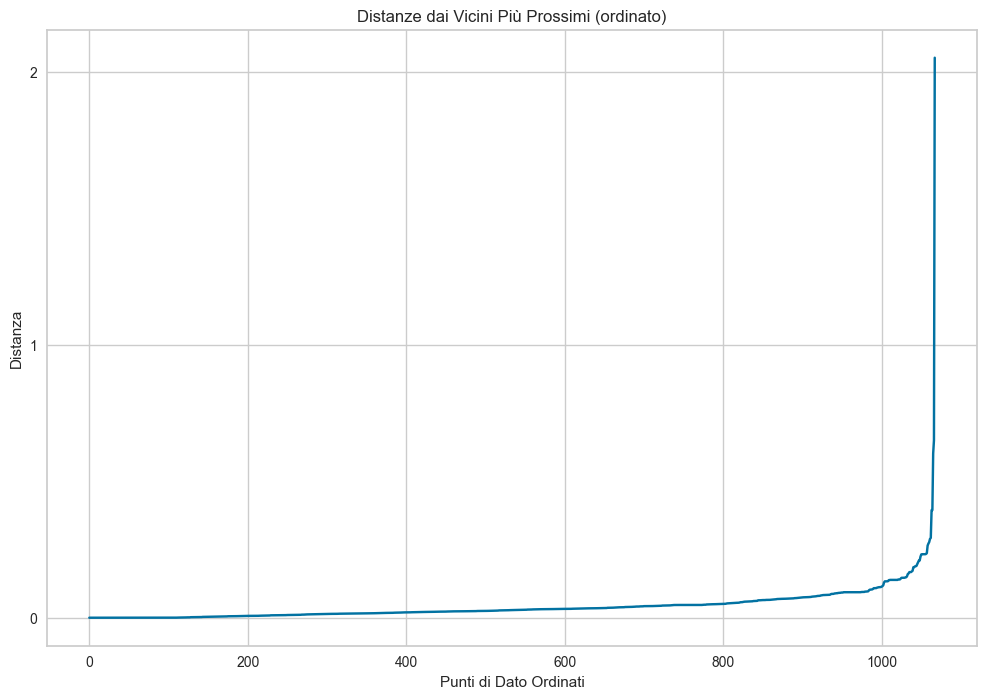

In [59]:
# Traccia il grafico per trovare il valore di epsilon
plt.figure(figsize=(12,8))
plt.plot(distances)
plt.title('Distanze dai Vicini Più Prossimi (ordinato)')
plt.xlabel('Punti di Dato Ordinati')
plt.ylabel('Distanza')
plt.grid(True)

y_ticks = np.arange(0, np.max(distances))
plt.yticks(y_ticks)

plt.show()

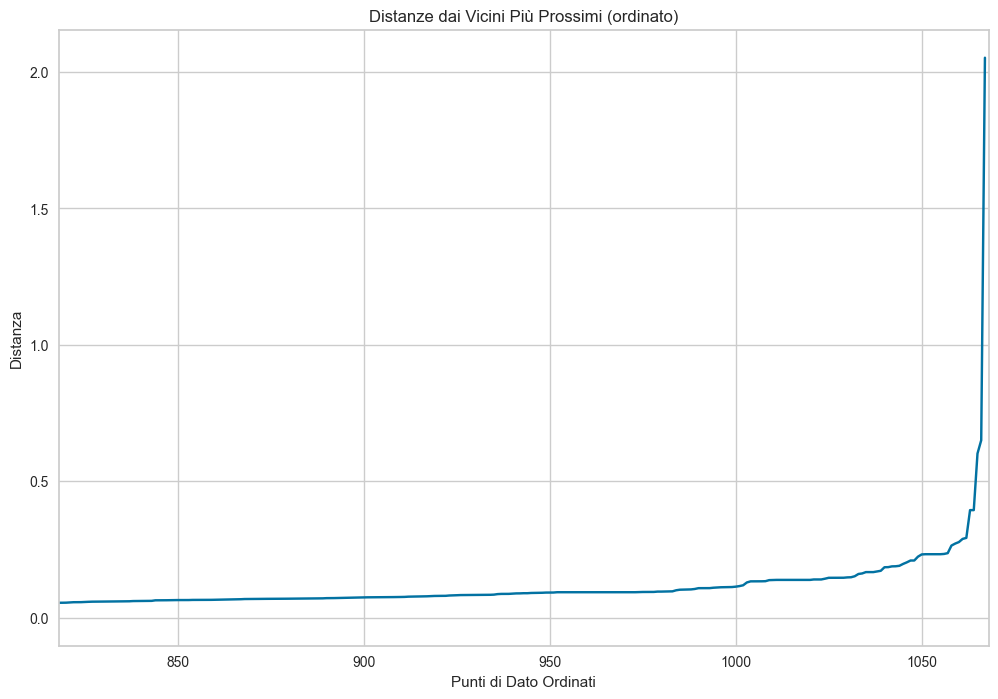

In [60]:
# Traccia il grafico per trovare il valore di epsilon
plt.figure(figsize=(12,8))
plt.plot(distances)
plt.title('Distanze dai Vicini Più Prossimi (ordinato)')
plt.xlabel('Punti di Dato Ordinati')
plt.ylabel('Distanza')
plt.grid(True)

# Aggiungi i tick ogni 0.1 sull'asse y
y_ticks = np.arange(0, np.max(distances), 0.5)  # passo di 0.1
plt.yticks(y_ticks)

# Fai lo zoom negli ultimi 400 punti sull'asse delle x
plt.xlim(len(distances)-250, len(distances))  # zoom sugli ultimi 400 punti

plt.show()


In [61]:
#distanze normali

kneedle = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")

# Epsilon è il valore della distanza al punto del ginocchio
epsilon = distances[kneedle.elbow]
print(f"Epsilon calcolato: {epsilon}")

Epsilon calcolato: 0.2336775550490439


In [62]:
# Esegui DBSCAN sui risultati della PCA
dbscan = DBSCAN(eps=epsilon, min_samples=k)  # Imposta eps e min_samples in base ai tuoi dati
dbscan_labels = dbscan.fit_predict(pca_result)

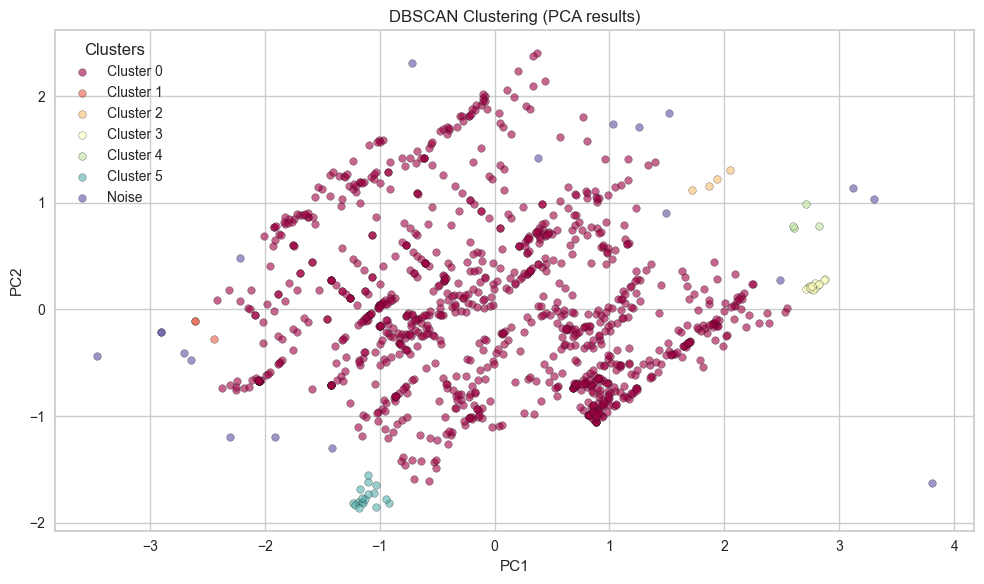

In [63]:
# Crea un grafico dei dati dopo l'applicazione della PCA
plt.figure(figsize=(10, 6))

# DBSCAN assegna -1 ai punti considerati "rumore"
unique_labels = set(dbscan_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for i, col in zip(unique_labels, colors):
    class_member_mask = (dbscan_labels == i)
    xy = pca_result[class_member_mask]
    
    plt.scatter(xy[:, 0], xy[:, 1], s=30, c=[col], label=f"Cluster {i}" if i != -1 else 'Noise', edgecolors='k', alpha=0.6)

plt.title('DBSCAN Clustering (PCA results)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Aggiusta la posizione e la dimensione della legenda per migliorarne la leggibilità
plt.legend(loc='upper left', fontsize=10, title="Clusters")

plt.tight_layout()  # Per evitare che la legenda si sovrapponga
plt.show()
